In [1]:
import pandas as pd
from atomrdf import KnowledgeGraph, System
import matplotlib.pyplot as plt
import numpy as np
from tqdm.notebook import trange
from tqdm.notebook import tqdm

In [2]:
df = pd.read_csv('data.csv')

In [3]:
sigma = np.array(df.Sigma.values)
rot_u = np.array(df.DisAxisU.values)
rot_v = np.array(df.DisAxisV.values)
rot_w = np.array(df.DisAxisW.values)
pla_u = np.array(df.BPN1.values)
pla_v = np.array(df.BPN2.values)
pla_w = np.array(df.BPN3.values)
mis_angle = np.array(df.DisAngle.values)
files = np.array(df.minEnergyStructFname.values)
energy = np.array(df.minGBenergy.values)
exvol = np.array(df.minGBexcessVolume.values)

In [40]:
kg = KnowledgeGraph()
mn = 7304

In [41]:
for x in trange(mn):
    #read file, and add to KG
    sys = System.read.file(f'minEnergyGBstructs/{files[x]}')
    el_counts = len(sys.composition)
    sys = System.read.file(f'minEnergyGBstructs/{files[x]}', graph=kg, species=['Al' for a in range(el_counts)], lattice='fcc')
    #sys = System.read.file(f'minEnergyGBstructs/{files[x]}', graph=kg, lattice='fcc')
    gb_dict = {"GBPlane": " ".join(np.array([pla_u[x], pla_v[x], pla_w[x]]).astype(str)),
               "RotationAxis": [rot_u[x], rot_v[x], rot_w[x]],
               "MisorientationAngle": mis_angle[x],
               "sigma": sigma[x],
               "GBType": None}
    sys.add_gb(gb_dict)
    kg.add_calculated_quantity(sys.sample, 'GrainBoundaryEnergy', energy[x], unit='J-PER-M2')
    kg.add_calculated_quantity(sys.sample, 'GrainBoundaryExcessVolume', exvol[x], unit='ANGSTROM')

  0%|          | 0/7304 [00:00<?, ?it/s]

/home/srmnitc/miniforge3/envs/workflow-rdf/lib/python3.11/site-packages/spglib/spglib.py:115: DeprecationWarning: dict interface (SpglibDataset['international']) is deprecated.Use attribute interface ({self.__class__.__name__}.{key}) instead
  warnings.warn(
/home/srmnitc/miniforge3/envs/workflow-rdf/lib/python3.11/site-packages/spglib/spglib.py:115: DeprecationWarning: dict interface (SpglibDataset['number']) is deprecated.Use attribute interface ({self.__class__.__name__}.{key}) instead
  warnings.warn(
/home/srmnitc/miniforge3/envs/workflow-rdf/lib/python3.11/site-packages/atomrdf/graph.py:416: UserWarning: asmo:hasValue has a range with unspecified datatype!
  warnings.warn(f"{triple[1].name} has a range with unspecified datatype!")


In [42]:
condition = (kg.terms.rdfs.label@kg.terms.cmso.CalculatedProperty=="GrainBoundaryEnergy")
kg.auto_query(kg.terms.cmso.AtomicScaleSample, 
                  [condition,
                   kg.terms.pldo.hasMisorientationAngle,
                   kg.terms.rdfs.label@kg.terms.cmso.CalculatedProperty, 
                   kg.terms.asmo.hasValue@kg.terms.cmso.CalculatedProperty
                  ], 
             )

In [43]:
condition = (kg.terms.rdfs.label@kg.terms.cmso.CalculatedProperty=="GrainBoundaryEnergy")
res = kg.auto_query(kg.terms.cmso.AtomicScaleSample, [condition,
                                                      kg.terms.pldo.hasMisorientationAngle,
                                                      kg.terms.rdfs.label@kg.terms.cmso.CalculatedProperty, 
                                                      kg.terms.asmo.hasValue@kg.terms.cmso.CalculatedProperty], 
                    )

In [44]:
res

,AtomicScaleSample,CalculatedProperty_labelvalue,hasMisorientationAnglevalue,CalculatedProperty_labelvalue,CalculatedProperty_hasValuevalue
0,sample:b3fac26d-8cc8-445f-9897-cccce628098e,GrainBoundaryEnergy,60.0,GrainBoundaryEnergy,431
1,sample:9889a974-f219-4fc1-bbff-097115026094,GrainBoundaryEnergy,60.0,GrainBoundaryEnergy,328
2,sample:c2032f9c-1e36-4555-bcd0-e28d58424bc3,GrainBoundaryEnergy,60.0,GrainBoundaryEnergy,75
3,sample:fa5dad8e-36c7-4502-a0a7-857643a2d527,GrainBoundaryEnergy,60.0,GrainBoundaryEnergy,354
4,sample:40b297a9-1fa7-4e78-a1c8-5df2bccb9ca1,GrainBoundaryEnergy,60.0,GrainBoundaryEnergy,404
...,...,...,...,...,...
7299,sample:8736b37c-b03c-4e78-8617-3eef8363f5f9,GrainBoundaryEnergy,58.4983901,GrainBoundaryEnergy,467
7300,sample:af9c6bd3-8708-4ce4-bb34-ea63e33c5874,GrainBoundaryEnergy,58.4983901,GrainBoundaryEnergy,463
7301,sample:c2cf458b-7975-4e4b-a544-9a1af19576a7,GrainBoundaryEnergy,58.4983901,GrainBoundaryEnergy,559
7302,sample:e319624e-4e1b-4c29-8130-3e9406bd0a87,GrainBoundaryEnergy,58.4983901,GrainBoundaryEnergy,560


In [45]:
ma = np.array([x.toPython() for x in res.hasMisorientationAnglevalue.values])
en = np.array([x.toPython() for x in res.CalculatedProperty_hasValuevalue.values])

In [ ]:
np.column_stack(())

In [79]:
plt.rcParams.update({'font.size': 16})

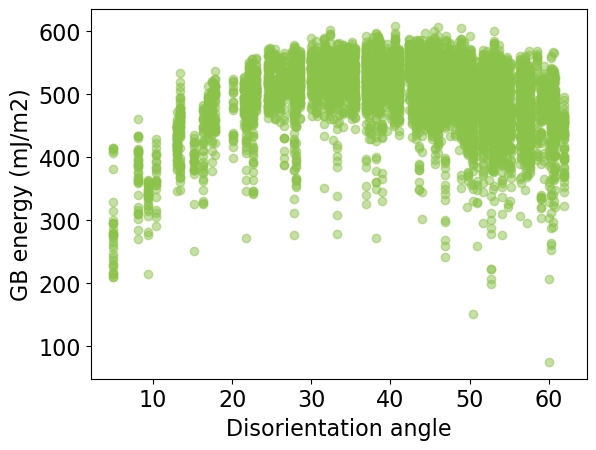

In [80]:
plt.plot(ma, en, 'o', alpha=0.5, c='#8bc34a', ms=6)
plt.ylabel(r'GB energy (mJ/m2)')
plt.xlabel(r'Disorientation angle')
plt.savefig('gb_plot.png', dpi=300, bbox_inches='tight')

In [72]:
kg.n_samples

7304

In [73]:
kg.archive('gb_final.tar.gz')